# Dynamic Salary Retirement Model

Table of content:
- [**Setup**](#Setup): Runs any imports or other setup
- [**Inputs**](#Inputs): Defines the input of the model
- [**Salaries**](#Salaries): Determines the annual salary based on cost of living and promotion raises.
- [**Wealth**](#Wealth): Calculates the wealth generating over the years.
- [**Retirement**](#Retirement): Calculates the Retirement Corpus after each year.

# Setup

Setups for the later calculations are here. The necessary packages are imported.

In [38]:
from dataclasses import dataclass
import pandas as pd
import matplotlib

# Inputs 
All the inputs for the model are defined here. A class is contructed to manage the data, and an instance of the class containing the default inputs is created.

In [39]:
@dataclass
class ModelInputs:
    starting_salary: int = 1200000
    promos_after_every_n_years: int = 2
    cost_of_living_raise: float = 0.02
    promo_raise: float = 0.15
    savings_rate: float = 0.1
    interest_rate: float = 0.15
    desired_cash: int = 500000000

model_data = ModelInputs()
model_data

ModelInputs(starting_salary=1200000, promos_after_every_n_years=2, cost_of_living_raise=0.02, promo_raise=0.15, savings_rate=0.3, interest_rate=0.1, desired_cash=500000000)

In [40]:
data = model_data

## Salaries

Using the Formula : $S_t = S_0(1 + r_l)^t (1 + r_p)^p$ we will calculate the salaries at different years.<br><br>
where
- $S_t$ : Salary at year $t$
- $S_0$ : Starting Salary
- $r_l$ : Return for cost of living
- $r_p$ : Return for Promotion
- $t$ : Number of Years
- $p$ : Number of Promotions

In [41]:
def salary_at_year(data, year):
    """
    Using this function will give you the salary at that particular year.
    """
    num_promos = int(year/data.promos_after_every_n_years)

    salary_t = data.starting_salary * (1 + data.cost_of_living_raise)**year * (1 + data.promo_raise)** num_promos
    return salary_t

In [42]:
for i in range(6):
    year = i +1
    salary = salary_at_year(model_data, year)
    print(f'The Salary at year {year} is ₹{salary:,.0f}')

The Salary at year 1 is ₹1,224,000
The Salary at year 2 is ₹1,435,752
The Salary at year 3 is ₹1,464,467
The Salary at year 4 is ₹1,717,820
The Salary at year 5 is ₹1,752,176
The Salary at year 6 is ₹2,055,303


## Wealth

Using the formula : $W_t = W_t-1 (1 + r_i) + S_t v$ we will calculate the Wealth generated at different years. <br><br>where
- $S_t$ : Salary at year $t$
- $W_t$ : Wealth at year $t$
- $r_i$ : Investment Return
- $t$ : Number of years
- $v$ : Savings Rate

In [43]:
def cash_saved_during_year(data, year):
    salary = salary_at_year(data, year)
    cash_saved = salary * data.savings_rate
    return cash_saved
cash_saved_during_year(model_data, 15)

1288813.153116825

In [44]:
def wealth_at_year(data, year, prior_wealth):
    cash_saved = cash_saved_during_year(data, year)
    wealth = prior_wealth * (1 + data.interest_rate) + cash_saved
    return wealth

In [45]:
prior_wealth = 0
for i in range(6):
    year = i + 1
    wealth = wealth_at_year(model_data, year, prior_wealth)
    print(f'The wealth at year {year} is ₹{wealth:,.0f}')

    prior_wealth = wealth

The wealth at year 1 is ₹367,200
The wealth at year 2 is ₹834,646
The wealth at year 3 is ₹1,357,450
The wealth at year 4 is ₹2,008,541
The wealth at year 5 is ₹2,735,048
The wealth at year 6 is ₹3,625,144


## Retirement

In [46]:
def years_to_retirement(data):

    # starting with no cash saved
    prior_wealth = 0
    wealth = 0

    year = 0 # will become 1 on first loop

    print('Wealth over time:') # \n makes a blank line in the outpu
    while wealth < data.desired_cash:
        year = year + 1
        wealth = wealth_at_year(data, year, prior_wealth)
        print(f'The wealth at year {year} is ₹{wealth:,.0f}')

        # set next year's prior wealth to this year's wealth
        prior_wealth = wealth
    
    # Now we have exited the loop, so wealth must be >= desired_cash. Whatever last year was set
    # is the years to retirement   
    print(f'\nRetirement:\nIt will take you {year} years to retire.')
    return year

In [47]:
ytr = years_to_retirement(model_data)

Wealth over time:
The wealth at year 1 is ₹367,200
The wealth at year 2 is ₹834,646
The wealth at year 3 is ₹1,357,450
The wealth at year 4 is ₹2,008,541
The wealth at year 5 is ₹2,735,048
The wealth at year 6 is ₹3,625,144
The wealth at year 7 is ₹4,616,581
The wealth at year 8 is ₹5,815,965
The wealth at year 9 is ₹7,150,043
The wealth at year 10 is ₹8,747,707
The wealth at year 11 is ₹10,522,791
The wealth at year 12 is ₹12,631,137
The wealth at year 13 is ₹14,971,439
The wealth at year 14 is ₹17,732,126
The wealth at year 15 is ₹20,794,151
The wealth at year 16 is ₹24,385,344
The wealth at year 17 is ₹28,365,892
The wealth at year 18 is ₹33,011,263
The wealth at year 19 is ₹38,157,347
The wealth at year 20 is ₹44,137,216
The wealth at year 21 is ₹50,758,355
The wealth at year 22 is ₹58,423,492
The wealth at year 23 is ₹66,906,928
The wealth at year 24 is ₹76,695,616
The wealth at year 25 is ₹87,525,132
The wealth at year 26 is ₹99,984,272
The wealth at year 27 is ₹113,763,459
The w

# Results Summary

In [48]:
def get_salaries_wealths_df(data):
    # Starting with no cash saved
    prior_wealth = 0
    wealth = 0
        
    year = 0 # will become 1 on first loop

    df_data_tups = []
    while wealth < data.desired_cash:
        year = year + 1
        salary = salary_at_year(data, year)
        wealth = wealth_at_year(model_data, year, prior_wealth)

        # set next year's prior wealth to this year's wealth
        prior_wealth = wealth

        df_data_tups.append((year, salary, wealth))

    df = pd.DataFrame(df_data_tups, columns = ['Year', 'Salary', 'Wealth'])
    return df

In [49]:
def style_salaries_wealth(df):
    return df.style.format({
        'Salary': '${:,.0f}',
        'Wealth': '${:,.0f}',
    }).bar(subset=['Salary', 'Wealth'])

In [50]:
df = get_salaries_wealths_df(model_data)
style_salaries_wealth(df)

,Year,Salary,Wealth
0,1,"$1,224,000","$367,200"
1,2,"$1,435,752","$834,646"
2,3,"$1,464,467","$1,357,450"
3,4,"$1,717,820","$2,008,541"
4,5,"$1,752,176","$2,735,048"
5,6,"$2,055,303","$3,625,144"
6,7,"$2,096,409","$4,616,581"
7,8,"$2,459,087","$5,815,965"
8,9,"$2,508,269","$7,150,043"
9,10,"$2,942,200","$8,747,707"


<Axes: xlabel='Year'>

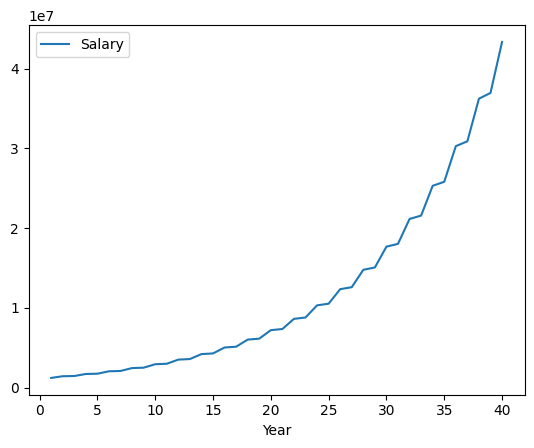

In [51]:
df.plot.line(x = 'Year', y = 'Salary')

<Axes: xlabel='Year'>

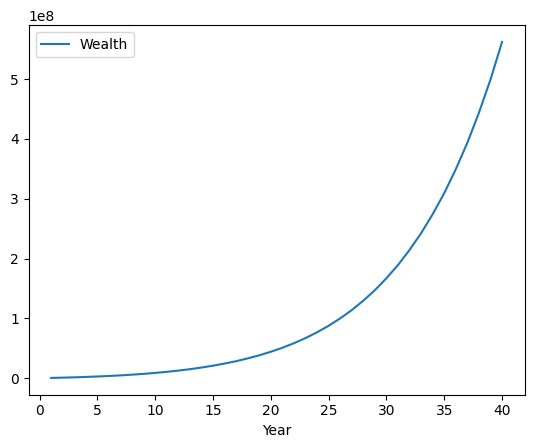

In [52]:
df.plot.line(x = 'Year', y = 'Wealth')

<Axes: xlabel='Year'>

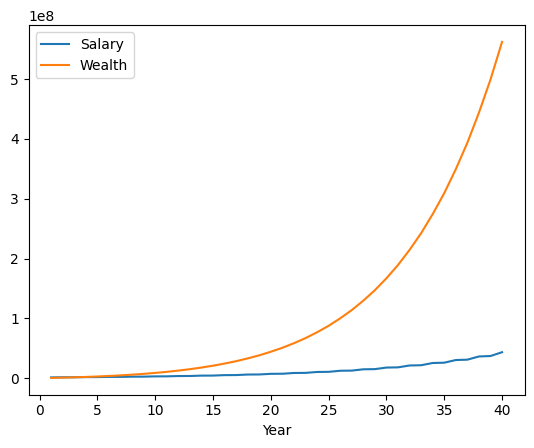

In [53]:
df.plot.line(x = 'Year')